In [1]:
require(glmnet)
require(caret)

Loading required package: glmnet
Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-16

Loading required package: caret
Loading required package: lattice
Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.5.3"

# Criação dos dados e atribuição dos parâmetros

In [2]:
set.seed(7)
x = rnorm(100, 2, 0.5)
e = rnorm(100)
b0=1.4
b1=2.5
b2=7.2
b3=1.8

In [3]:
y = b0+x*b1+(x^2)*b2+(x^3)*b3+e
X=model.matrix(y~x+I(x^2)+I(x^3))[,-1]
head(X)

,x,I(x^2),I(x^3)
1,3.143624,9.882369,31.066449
2,1.401614,1.964522,2.753502
3,1.652854,2.731926,4.515473
4,1.793854,3.217910,5.772460
5,1.514663,2.294205,3.474948
6,1.526360,2.329775,3.556075


In [4]:
dados=cbind.data.frame(X,y)
head(dados)

x,I(x^2),I(x^3),y
3.143624,9.882369,31.066449,136.85078
1.401614,1.964522,2.753502,24.59244
1.652854,2.731926,4.515473,33.25052
1.793854,3.217910,5.772460,38.26966
1.514663,2.294205,3.474948,28.26856
1.526360,2.329775,3.556075,26.78734


In [5]:
lambda = 10^seq(-4, 4, length = 200)

# Regressão Ridge

In [6]:
modelo1 <- train(
  y ~., data = dados, method = "glmnet",
  trControl = trainControl("cv", number = 10),
  tuneGrid = expand.grid(alpha = 0, lambda = lambda),
  metric="MAE"
)

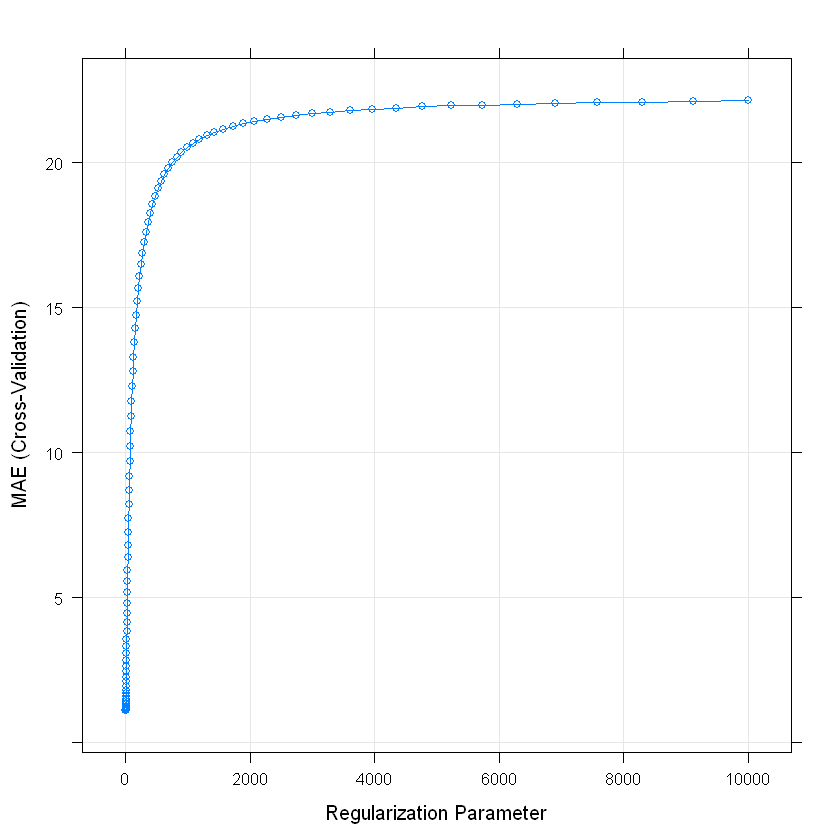

In [7]:
plot(modelo1,sign.lambda = 1)

In [8]:
pos=which(modelo1$results$lambda==modelo1$bestTune$lambda)
modelo1$results[pos,]

,alpha,lambda,RMSE,Rsquared,MAE,RMSESD,RsquaredSD,MAESD
110,0,2.409404,1.522001,0.9983686,1.132945,1.003832,0.0007841911,0.6698163


In [9]:
coef(modelo1$finalModel, modelo1$bestTune$lambda)

4 x 1 sparse Matrix of class "dgCMatrix"
                     1
(Intercept) -12.608197
x            16.501429
`I(x^2)`      4.594370
`I(x^3)`      1.500953

# Regressão Lasso

In [10]:
modelo2 <- train(
  y ~., data = dados, method = "glmnet",
  trControl = trainControl("cv", number = 10),
  tuneGrid = expand.grid(alpha = 1, lambda = lambda),
  metric="MAE"
)

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."

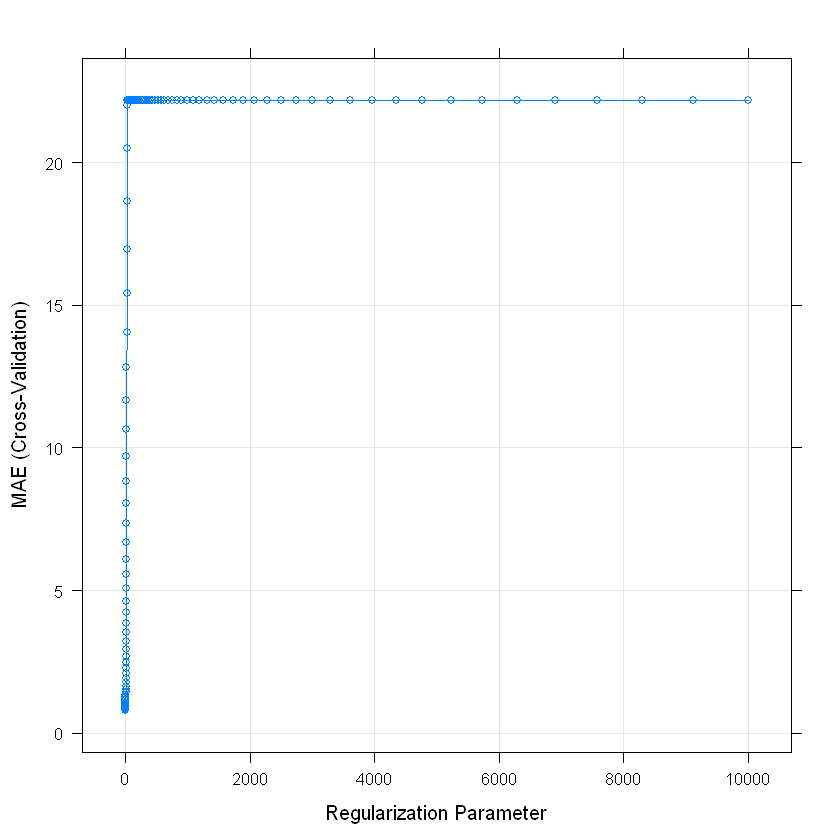

In [11]:
plot(modelo2,sign.lambda = 1)

In [12]:
pos=which(modelo2$results$lambda==modelo2$bestTune$lambda)
modelo2$results[pos,]

,alpha,lambda,RMSE,Rsquared,MAE,RMSESD,RsquaredSD,MAESD
81,1,0.1644676,0.9958611,0.9987675,0.8107235,0.2183334,0.001122578,0.203143


In [13]:
coef(modelo2$finalModel, modelo2$bestTune$lambda)

4 x 1 sparse Matrix of class "dgCMatrix"
                   1
(Intercept) 2.563494
x           .       
`I(x^2)`    8.999799
`I(x^3)`    1.414493

# Elastic Net

In [14]:
modelo3 <- train(
  y ~., data =dados, method = "glmnet",
  trControl = trainControl("cv", number = 10),
  tuneLength = 10,
  metric="MAE"
)

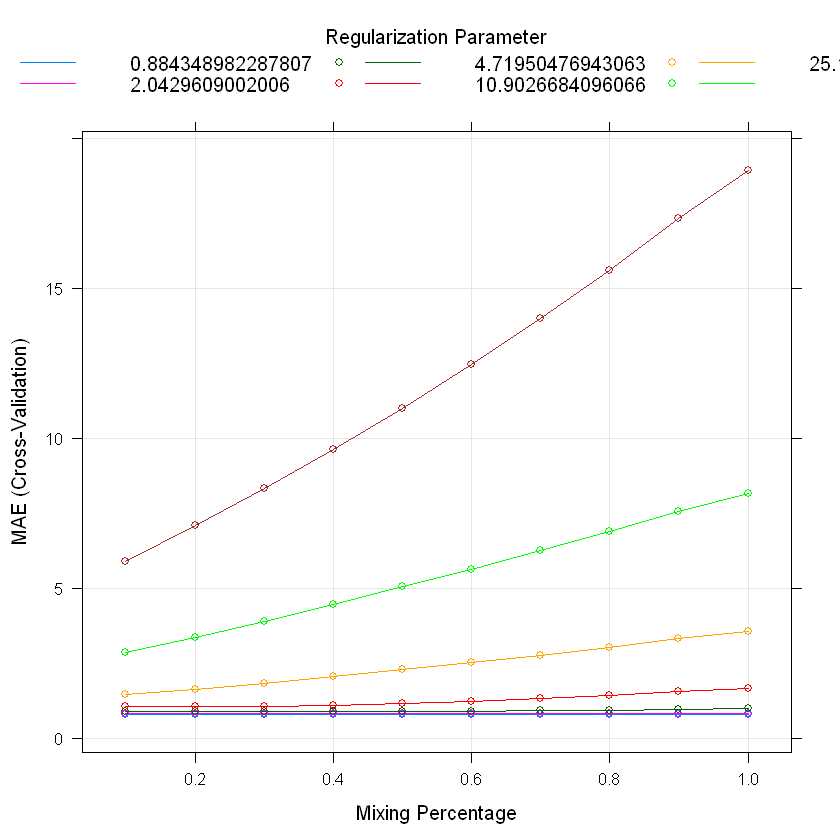

In [15]:
plot(modelo3,sign.lambda = 1)

In [16]:
pos=which(modelo3$results$alpha==modelo3$bestTune$alpha & modelo3$results$lambda==modelo3$bestTune$lambda)
modelo3$results[pos,]

,alpha,lambda,RMSE,Rsquared,MAE,RMSESD,RsquaredSD,MAESD
57,0.9,0.1657108,0.9545851,0.9990228,0.786608,0.2301712,0.0005973043,0.2127513


In [17]:
coef(modelo3$finalModel, modelo3$bestTune$lambda)

4 x 1 sparse Matrix of class "dgCMatrix"
                    1
(Intercept) -2.620497
x            7.493423
`I(x^2)`     5.562666
`I(x^3)`     1.916511

In [18]:
modelos = list(Ridge = modelo1, Lasso = modelo2, Elastic_Net = modelo3)
summary(resamples(modelos), metric = c("RMSE","MAE","Rsquared"))


Call:
summary.resamples(object = resamples(modelos), metric = c("RMSE",
 "MAE", "Rsquared"))

Models: Ridge, Lasso, Elastic_Net 
Number of resamples: 10 

RMSE 
                 Min.   1st Qu.    Median      Mean  3rd Qu.     Max. NA's
Ridge       0.6472838 0.8827313 1.1862040 1.5220013 1.573440 3.677943    0
Lasso       0.6626747 0.9313039 0.9548530 0.9958611 1.166018 1.307871    0
Elastic_Net 0.6453453 0.7860743 0.9278534 0.9545851 1.097566 1.336260    0

MAE 
                 Min.   1st Qu.    Median      Mean   3rd Qu.     Max. NA's
Ridge       0.4462966 0.7458062 0.9220326 1.1329454 1.1478314 2.523748    0
Lasso       0.5130611 0.6442128 0.8235175 0.8107235 0.9333442 1.104932    0
Elastic_Net 0.4756163 0.6717140 0.7344688 0.7866080 0.9366188 1.131998    0

Rsquared 
                 Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
Ridge       0.9969065 0.9979365 0.9983361 0.9983686 0.9989557 0.9994046    0
Lasso       0.9959874 0.9983818 0.9991818 0.9987675 0.9993572 0